In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Most basic stuff for EDA.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re


# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading some sklearn packages for modelling.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/CS_441_final_project'

train_df = pd.read_csv(data_dir + '/train.csv', sep = ',')
test_df = pd.read_csv(data_dir + '/test.csv' , sep = ',')

Mounted at /content/drive


In [ ]:
display(train_df.head())
display(test_df.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Oops, A lot of NaN valuess!! Need to get info of all the NaN values. Also we can see a lot of # which needs to be removed before EDA.

In [ ]:
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


None

All Nan values are present in Keyword and Location columns. Others are intact. Lets fillna()!!  


In [ ]:
for df in [train_df, test_df]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'Missing_{col}')
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3263 non-null   object
 2   location  3263 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


None

Before doing EDA, Let us perform some standard NLP cleaning like removing URL and punctuations from text. This is really key because if we don't do it, then the analysis would contain unnecessary noise and might prove to be ineffective.



In [ ]:
def remove_URL(text):
    url_pattern = re.compile(r'https?://\S+|(?:www\.)\S+', re.IGNORECASE)
    return url_pattern.sub('', text)


def remove_punctuations(text):
    # Define regular expression pattern to match punctuation
    pattern = r'[^\w\s]'
    # Remove punctuation using re.sub() method
    text = re.sub(pattern, '', text)
    return text

train_df['text_clean'] = train_df['text'].apply(lambda x: remove_URL(x)).apply(lambda x: remove_punctuations(x))

display(train_df)

,id,keyword,location,text,target,text_clean
0,1,Missing_keyword,Missing_location,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,Missing_keyword,Missing_location,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,Missing_keyword,Missing_location,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,Missing_keyword,Missing_location,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,Missing_keyword,Missing_location,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...
...,...,...,...,...,...,...
7608,10869,Missing_keyword,Missing_location,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,Missing_keyword,Missing_location,@aria_ahrary @TheTawniest The out of control w...,1,aria_ahrary TheTawniest The out of control wil...
7610,10871,Missing_keyword,Missing_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M194 0104 UTC5km S of Volcano Hawaii
7611,10872,Missing_keyword,Missing_location,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...


Let us start with basic text data analysis like comparing the word counts and character counts of disaster and non-disaster tweets.

In [ ]:
train_df['Character_Count'] = train_df['text_clean'].apply(lambda x: len(str(x)))

In [ ]:
train_df['word_count'] = train_df['text'].str.split().apply(lambda x: len(x))

<Axes: xlabel='word_count', ylabel='Count'>

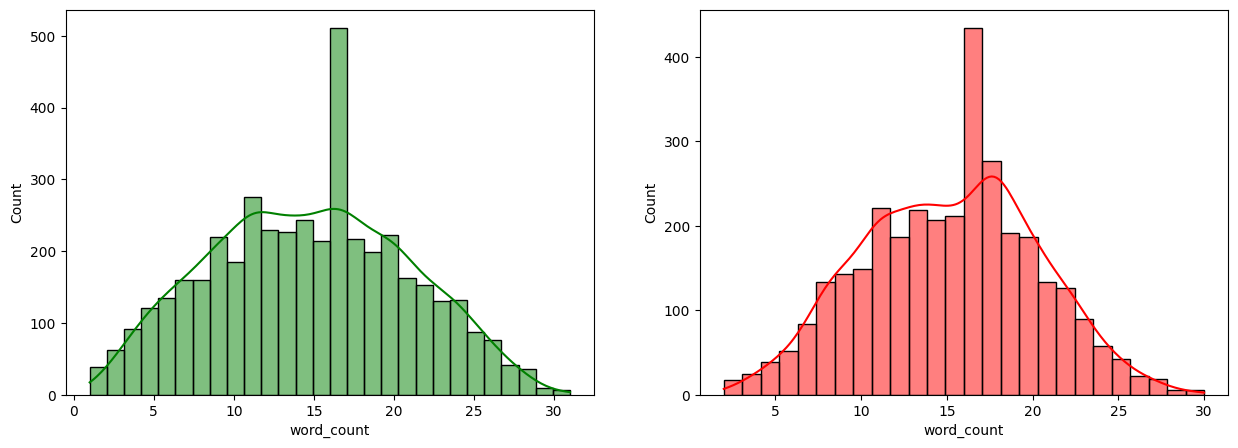

In [ ]:
fig,axes = plt.subplots(ncols=2,figsize=(15, 5))
sns.histplot(train_df[train_df['target']==0]['word_count'] , kde=True,ax=axes[0],color='green')
sns.histplot(train_df[train_df['target']==1]['word_count'] , kde=True,ax=axes[1],color='red')

As we can see above, the disaster tweet on average has more word counts. We can infer that people are trying to explain a disaster using more words whereas, non disaster tweet are shorter in size.  

<Axes: xlabel='Character_Count', ylabel='Count'>

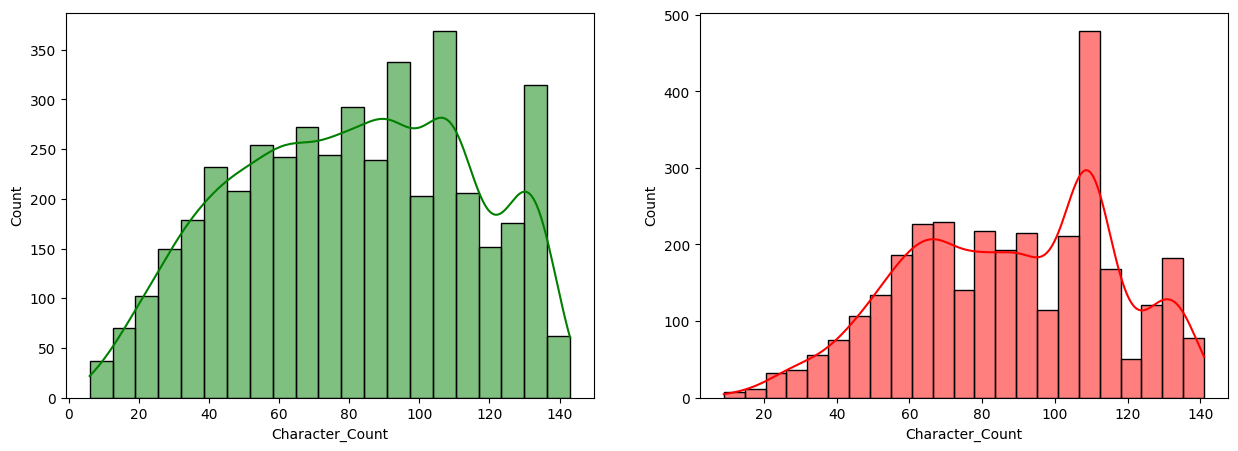

In [ ]:
fig,axes = plt.subplots(ncols=2,figsize=(15, 5))
sns.histplot(train_df[train_df['target']==0]['Character_Count'] , kde=True,ax=axes[0],color='green')
sns.histplot(train_df[train_df['target']==1]['Character_Count'] , kde=True,ax=axes[1],color='red')



The same can be observed with character counts above. On average, disaster tweet has more characters than non disaster tweets.

Now, let us analyse if there are any common trends in these tweets. Let us look for common words used for disaster and non-disaster tweets

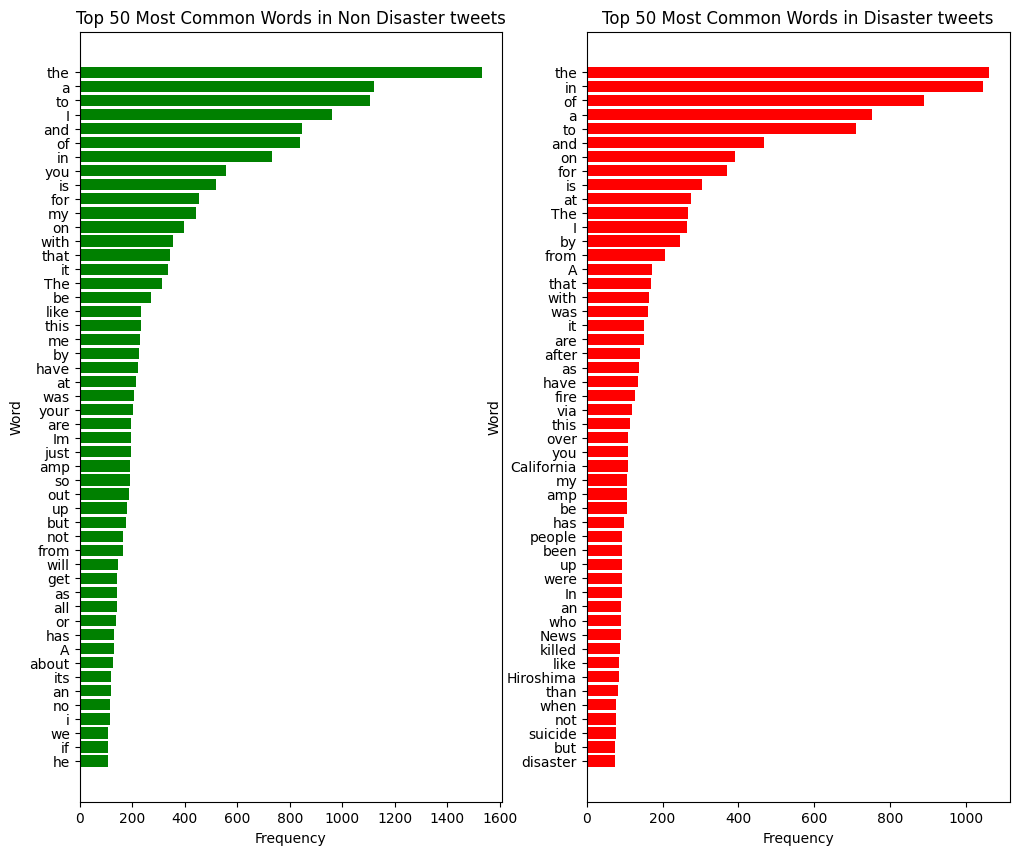

In [ ]:
tokens_disaster = []
tokens_non_disaster = []
for text in train_df[train_df['target']==0]['text_clean']:
    tokens_non_disaster += text.split()

for text in train_df[train_df['target']==1]['text_clean']:
    tokens_disaster += text.split()

# calculate the frequency distribution of the words
count_non_dis = FreqDist(tokens_non_disaster)
count_dis = FreqDist(tokens_disaster)

top_words_non = count_non_dis.most_common(50)[::-1]
words_n, freqs_n = zip(*top_words_non)

top_words_dis = count_dis.most_common(50)[::-1]
words_d, freqs_d = zip(*top_words_dis)

fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,10))
# Plot the top 50 most common words as horizontal bars
ax1.barh(words_n, freqs_n, color='green')
ax2.barh(words_d, freqs_d, color='red')

ax1.set_title('Top 50 Most Common Words in Non Disaster tweets')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Word')

ax2.set_title('Top 50 Most Common Words in Disaster tweets')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Word')
# plot the frequency distribution of the top 20 words

plt.show()

Ughhh!! All this to see stopwords dominate the charts!? :(
Lets remove all the stopwords which do not contribute anything to our model.

In [ ]:
#Tokenize the text so that we can remove stop words
train_df['tokenized'] = train_df['text_clean'].apply(word_tokenize)

# Make all the token as lower case
train_df['lower'] = train_df['tokenized'].apply(lambda x: [word.lower() for word in x])

stop = set(stopwords.words('english'))
#Remove the stopwords
train_df['stopwords_removed'] = train_df['lower'].apply(lambda x: [word for word in x if word not in stop])

#train_df['new_lower'] = train_df['text_clean'].apply(lambda x: x.lower())
#Can be used to skip tokenization, and removal of stop words which is not required for BERT.

display(train_df)

,id,keyword,location,text,target,text_clean,Character_Count,word_count,tokenized,lower,stopwords_removed
0,1,Missing_keyword,Missing_location,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,68,13,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,Missing_keyword,Missing_location,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,37,7,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,Missing_keyword,Missing_location,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,130,22,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,Missing_keyword,Missing_location,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,63,8,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,Missing_keyword,Missing_location,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,86,16,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,Missing_keyword,Missing_location,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,61,11,"[Two, giant, cranes, holding, a, bridge, colla...","[two, giant, cranes, holding, a, bridge, colla...","[two, giant, cranes, holding, bridge, collapse..."
7609,10870,Missing_keyword,Missing_location,@aria_ahrary @TheTawniest The out of control w...,1,aria_ahrary TheTawniest The out of control wil...,121,20,"[aria_ahrary, TheTawniest, The, out, of, contr...","[aria_ahrary, thetawniest, the, out, of, contr...","[aria_ahrary, thetawniest, control, wild, fire..."
7610,10871,Missing_keyword,Missing_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M194 0104 UTC5km S of Volcano Hawaii,37,8,"[M194, 0104, UTC5km, S, of, Volcano, Hawaii]","[m194, 0104, utc5km, s, of, volcano, hawaii]","[m194, 0104, utc5km, volcano, hawaii]"
7611,10872,Missing_keyword,Missing_location,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...,132,19,"[Police, investigating, after, an, ebike, coll...","[police, investigating, after, an, ebike, coll...","[police, investigating, ebike, collided, car, ..."


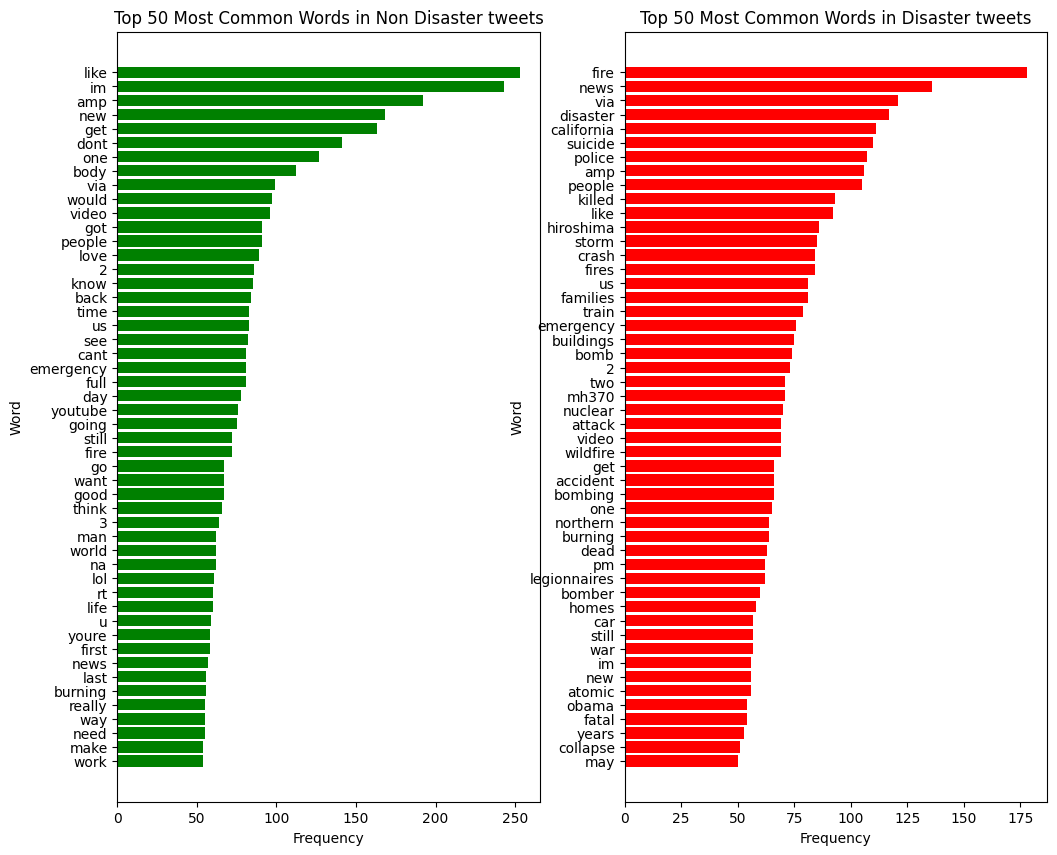

In [ ]:
tokens_disaster = []
tokens_non_disaster = []
for text in train_df[train_df['target']==0]['stopwords_removed']:
    tokens_non_disaster += text

for text in train_df[train_df['target']==1]['stopwords_removed']:
    tokens_disaster += text

# calculate the frequency distribution of the words
count_non_dis = FreqDist(tokens_non_disaster)
count_dis = FreqDist(tokens_disaster)

top_words_non = count_non_dis.most_common(50)[::-1]
words_n, freqs_n = zip(*top_words_non)

top_words_dis = count_dis.most_common(50)[::-1]
words_d, freqs_d = zip(*top_words_dis)

fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,10))
# Plot the top 50 most common words as horizontal bars
ax1.barh(words_n, freqs_n, color='green')
ax2.barh(words_d, freqs_d, color='red')

ax1.set_title('Top 50 Most Common Words in Non Disaster tweets')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Word')

ax2.set_title('Top 50 Most Common Words in Disaster tweets')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Word')
# plot the frequency distribution of the top 20 words

plt.show()

We can now see a clear difference between frequent words in Disaster tweets and Non Disaster tweets. All the top words in disaster tweet indicates disaster and all the words in non-disaster tweet indicates a casual tone. Now we are all set to vectrize the text data using different methods and apply some baseline models. Hopefully our model see these trends and predict the right targets!

Note: Because we are planning to use more advanced models like BERT,RoBERTa , we decided to not perform complex traditional text pre-processing techniques  like lemmatization, POS_tag etc.

In [ ]:
train_df['stopwords_removed_sentence'] = train_df['stopwords_removed'].apply(lambda x: ' '.join(x))
X = train_df['stopwords_removed_sentence']
y = train_df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
# create a CountVectorizer object
count_vect = CountVectorizer(ngram_range=(1, 3), binary=True)

# fit and transform the training data
X_train_BOW = count_vect.fit_transform(X_train)

# transform the validation data
X_val_BOW = count_vect.transform(X_val)


In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train)
X_val_tfidf = tf_idf.transform(X_val)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
def Multinomial_NB(X_train,X_val,y_train,y_val):

  model=MultinomialNB(alpha = 0.1)

  model.fit(X_train, y_train)

  labels = model.predict(X_val)

  #Check the accuracy of our MultinomialNB classifier
  score = metrics.accuracy_score(y_val,labels,normalize=True)
  print("Validation accuracy: %0.3f" % score)

  labels = model.predict(X_train)

  #Check the accuracy of our MultinomialNB classifier
  score = metrics.accuracy_score(y_train,labels,normalize=True)
  print("Training accuracy: %0.3f" % score)


In [ ]:
print('Accuracy for BOW')
Multinomial_NB(X_train_BOW,X_val_BOW,y_train,y_val)


Accuracy for BOW
Validation accuracy: 0.768
Training accuracy: 0.984


In [ ]:
print('Accuracy for tf-idf')
Multinomial_NB(X_train_tfidf,X_val_tfidf,y_train,y_val)

Accuracy for tf-idf
Validation accuracy: 0.780
Training accuracy: 0.983


In [ ]:
from sklearn.linear_model import LogisticRegression
def Log_regression(X_train,X_val,y_train,y_val):
  # Define our logistic regression model with default parameters
  model = LogisticRegression(max_iter = 10000)

  # Fit the model to the training data
  model.fit(X_train, y_train)

  # Make predictions on the validation data
  labels = model.predict(X_val)

  # Evaluate the model's accuracy on the validation data
  score = model.score(X_val, y_val)

  print("Validation accuracy: %0.3f" % score)

  # Make predictions on the training data
  labels = model.predict(X_train)

  # Evaluate the model's accuracy on the training data
  score = model.score(X_train, y_train)
  print("Training accuracy: %0.3f" % score)




In [ ]:
print('Accuracy for BOW')
Log_regression(X_train_BOW,X_val_BOW,y_train,y_val)

Accuracy for BOW
Validation accuracy: 0.776
Training accuracy: 0.985


In [ ]:
print('Accuracy for tf-idf')
Log_regression(X_train_tfidf,X_val_tfidf,y_train,y_val)

Accuracy for tf-idf
Validation accuracy: 0.790
Training accuracy: 0.919


In [ ]:
from sklearn.ensemble import RandomForestClassifier
def RF(X_train,X_val,y_train,y_val):
  # Define our random forest model with 200 trees and default parameters
  model = RandomForestClassifier(n_estimators=200)

  # Fit the model to the training data
  model.fit(X_train, y_train)

  # Make predictions on the validation data
  labels = model.predict(X_val)

  # Evaluate the model's accuracy on the validation data
  score = model.score(X_val, y_val)
  print("Validation accuracy: %0.3f" % score)

  # Make predictions on the training data
  labels = model.predict(X_train)

  # Evaluate the model's accuracy on the training data
  score = model.score(X_train, y_train)
  print("Training accuracy: %0.3f" % score)


In [ ]:
print('Accuracy for BOW')
RF(X_train_BOW,X_val_BOW,y_train,y_val)

Accuracy for BOW
Validation accuracy: 0.769
Training accuracy: 0.988


In [ ]:
print('Accuracy for tf-idf')
RF(X_train_tfidf,X_val_tfidf,y_train,y_val)

Accuracy for tf-idf
Validation accuracy: 0.764
Training accuracy: 0.988


Lets try one more technique to convert words into vector.

In [ ]:
import pandas as pd
import nltk
import gensim.downloader as api

# Download the pre-trained GloVe embeddings
glove_model = api.load("glove-twitter-100")





[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
X = train_df['stopwords_removed']
y = train_df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
def get_sentence_embedding(sentence):
    embeddings = []
    for word in sentence:
        if word in glove_model:
            embeddings.append(glove_model[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_model.vector_size)


# Get embeddings for train data
X_glove_train = pd.DataFrame(X_train.apply(lambda x: pd.Series(get_sentence_embedding(x))))
# Rename columns
X_glove_train = X_glove_train.rename(columns=lambda x: f'glove_{x}')

# Get embeddings for validation data
X_glove_val = pd.DataFrame(X_val.apply(lambda x: pd.Series(get_sentence_embedding(x))))
# Rename columns
X_glove_val = X_glove_val.rename(columns=lambda x: f'glove_{x}')


In [ ]:
Log_regression(X_glove_train,X_glove_val,y_train,y_val)


Validation accuracy: 0.811
Training accuracy: 0.800


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# perform grid search cross-validation to find best hyperparameters
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_glove_train, y_train)

# evaluate the best model on the validation set
best_model = grid_search.best_estimator_
val_accuracy = best_model.score(X_glove_val, y_val)

print("Best hyperparameters: ", grid_search.best_params_)
print("Validation accuracy: {:.3f}".format(val_accuracy))

Best hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Validation accuracy: 0.810


In [ ]:
Best_model = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
Best_model.fit(X_glove_train, y_train)
labels = Best_model.predict(X_glove_val)

score = Best_model.score(X_glove_val, y_val)

print("Validation accuracy: %0.3f" % score)

score = Best_model.score(X_glove_train, y_train)
print("Training accuracy: %0.3f" % score)

Validation accuracy: 0.810
Training accuracy: 0.801


In [ ]:
RF(X_glove_train,X_glove_val,y_train,y_val)

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm.notebook import tqdm, trange
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [ ]:
# class Model(nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.fc1 = nn.Linear(100, 50)  # 5*5 from image dimension
#         self.fc2 = nn.Linear(50, 2)
#         print(self.fc2.weight.dtype, self.fc2.bias.dtype)

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(100, 200)  # 5*5 from image dimension
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 200)
        self.fc4 = nn.Linear(200, 2)
        print(self.fc2.weight.dtype, self.fc2.bias.dtype)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
model = Model().double().to(device)
print(sum(p.numel() for p in model.parameters()))

torch.float32 torch.float32
101002


In [ ]:
class TweetDataset(Dataset):
    def process_data(self, data_df):
        y = data_df['target'].to_numpy()
        data_df = data_df.drop(columns=['target'])
        X = data_df.to_numpy()
        return X, y
    def __init__(self, data_df):
        super(TweetDataset, self).__init__()

        X, y = self.process_data(data_df)

        self.X = torch.from_numpy(X).double()
        self.y = torch.from_numpy(y).long()
        print(self.X.dtype)
        print('X.shape', self.X.shape, 'y.shape', self.y.shape)
        self.len = X.shape[0]

    def __getitem__(self, index):
        if torch.is_tensor(index):
           index = index.tolist()
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

In [ ]:
train_df_ = pd.concat([X_glove_train,y_train],axis=1)
val_df_ = pd.concat([X_glove_val,y_val],axis=1)

In [ ]:
train_set = TweetDataset(train_df_)
val_set = TweetDataset(val_df_)

torch.float64
X.shape torch.Size([6851, 100]) y.shape torch.Size([6851])
torch.float64
X.shape torch.Size([762, 100]) y.shape torch.Size([762])


In [ ]:
# # Convert training data to numpy arrays
# X_train = np.array(X_glove_train)
# y_train = np.array(y_train).reshape(-1, 1)

# # Convert validation data to numpy arrays
# X_val = np.array(X_glove_val)
# y_val = np.array(y_val).reshape(-1, 1)

# # Convert numpy arrays to PyTorch tensors
# X_train_tensor = torch.from_numpy(X_train).float()
# y_train_tensor = torch.from_numpy(y_train).float()
# X_val_tensor = torch.from_numpy(X_val).float()
# y_val_tensor = torch.from_numpy(y_val).float()
# y_train_tensor = y_train_tensor.squeeze()
# y_val_tensor = y_val_tensor.squeeze()
# train_set = X_train_tensor,y_train_tensor
# val_set = X_val_tensor,y_val_tensor


In [ ]:
train_loader = DataLoader(dataset=train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_set, batch_size=32, shuffle=False)

In [ ]:
def plot_loss(loss, title, xlabel, ylabel):
    epoch = list(range(len(loss)))
    plt.plot(epoch, loss)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epoch_count = 100
epoch_train_loss = []
epoch_val_loss = []
patience = np.Inf
patience_lost = 0
for epoch in range(1, epoch_count+1):
    print('Epoch', epoch)
    model.train()
    batch_train_loss = []
    for (X, y) in tqdm(train_loader, desc='Training epoch ' + str(epoch), leave=False):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(X)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        batch_train_loss.append(loss.item())
    epoch_train_loss.append(np.mean(batch_train_loss))
    print('Train loss: %.3f' % epoch_train_loss[-1], flush=True, end='')

    batch_val_loss = []
    model.eval()
    with torch.no_grad():
        for (X, y) in tqdm(val_loader, desc='Validation epoch', leave=False):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = criterion(pred, y)
            batch_val_loss.append(loss.item())
    epoch_val_loss.append(np.mean(batch_val_loss))
    print('Val loss: %.3f' % epoch_val_loss[-1], flush=True)
    if(epoch > 1):
        if(epoch_val_loss[-1] >= epoch_val_loss[-2]):
            patience_lost += 1
            if(patience_lost == patience):
                break
        else:
            patience_lost = 0

Epoch 1


Training epoch 1:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.481

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.437
Epoch 2


Training epoch 2:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.426

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.424
Epoch 3


Training epoch 3:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.401

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.418
Epoch 4


Training epoch 4:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.381

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.435
Epoch 5


Training epoch 5:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.358

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.445
Epoch 6


Training epoch 6:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.333

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.460
Epoch 7


Training epoch 7:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.312

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.506
Epoch 8


Training epoch 8:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.293

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.531
Epoch 9


Training epoch 9:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.259

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.531
Epoch 10


Training epoch 10:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.232

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.595
Epoch 11


Training epoch 11:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.205

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.682
Epoch 12


Training epoch 12:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.193

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.742
Epoch 13


Training epoch 13:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.166

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.927
Epoch 14


Training epoch 14:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.188

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.963
Epoch 15


Training epoch 15:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.132

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 0.885
Epoch 16


Training epoch 16:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.116

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.049
Epoch 17


Training epoch 17:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.099

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.103
Epoch 18


Training epoch 18:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.085

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.344
Epoch 19


Training epoch 19:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.074

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.488
Epoch 20


Training epoch 20:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.090

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.440
Epoch 21


Training epoch 21:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.087

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.403
Epoch 22


Training epoch 22:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.071

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.642
Epoch 23


Training epoch 23:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.082

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.494
Epoch 24


Training epoch 24:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.062

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.553
Epoch 25


Training epoch 25:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.060

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.512
Epoch 26


Training epoch 26:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.053

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.637
Epoch 27


Training epoch 27:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.076

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.565
Epoch 28


Training epoch 28:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.059

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.927
Epoch 29


Training epoch 29:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.052

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.872
Epoch 30


Training epoch 30:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.073

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.563
Epoch 31


Training epoch 31:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.055

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.865
Epoch 32


Training epoch 32:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.043

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.983
Epoch 33


Training epoch 33:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.035

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.136
Epoch 34


Training epoch 34:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.041

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.004
Epoch 35


Training epoch 35:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.078

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.832
Epoch 36


Training epoch 36:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.063

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.916
Epoch 37


Training epoch 37:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.054

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.717
Epoch 38


Training epoch 38:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.047

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.772
Epoch 39


Training epoch 39:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.043

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.872
Epoch 40


Training epoch 40:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.048

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.020
Epoch 41


Training epoch 41:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.044

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.107
Epoch 42


Training epoch 42:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.059

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.958
Epoch 43


Training epoch 43:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.068

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.780
Epoch 44


Training epoch 44:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.057

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.770
Epoch 45


Training epoch 45:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.052

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.858
Epoch 46


Training epoch 46:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.044

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.048
Epoch 47


Training epoch 47:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.037

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.257
Epoch 48


Training epoch 48:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.040

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.228
Epoch 49


Training epoch 49:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.038

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.303
Epoch 50


Training epoch 50:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.045

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.214
Epoch 51


Training epoch 51:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.060

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.099
Epoch 52


Training epoch 52:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.048

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.057
Epoch 53


Training epoch 53:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.044

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.164
Epoch 54


Training epoch 54:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.040

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.224
Epoch 55


Training epoch 55:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.044

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.243
Epoch 56


Training epoch 56:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.041

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.407
Epoch 57


Training epoch 57:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.050

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.078
Epoch 58


Training epoch 58:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.038

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.214
Epoch 59


Training epoch 59:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.036

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.472
Epoch 60


Training epoch 60:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.061

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.970
Epoch 61


Training epoch 61:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.054

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.007
Epoch 62


Training epoch 62:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.040

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.374
Epoch 63


Training epoch 63:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.043

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.396
Epoch 64


Training epoch 64:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.039

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.264
Epoch 65


Training epoch 65:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.041

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.463
Epoch 66


Training epoch 66:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.044

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.341
Epoch 67


Training epoch 67:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.049

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.271
Epoch 68


Training epoch 68:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.043

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.131
Epoch 69


Training epoch 69:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.037

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.387
Epoch 70


Training epoch 70:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.048

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.302
Epoch 71


Training epoch 71:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.035

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.262
Epoch 72


Training epoch 72:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.032

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.496
Epoch 73


Training epoch 73:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.030

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.772
Epoch 74


Training epoch 74:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.031

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.700
Epoch 75


Training epoch 75:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.030

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.711
Epoch 76


Training epoch 76:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.030

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.876
Epoch 77


Training epoch 77:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.030

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.932
Epoch 78


Training epoch 78:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.030

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.957
Epoch 79


Training epoch 79:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.030

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 3.004
Epoch 80


Training epoch 80:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.044

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.116
Epoch 81


Training epoch 81:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.104

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.822
Epoch 82


Training epoch 82:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.048

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.036
Epoch 83


Training epoch 83:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.048

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.969
Epoch 84


Training epoch 84:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.036

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.291
Epoch 85


Training epoch 85:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.033

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.335
Epoch 86


Training epoch 86:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.033

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.509
Epoch 87


Training epoch 87:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.036

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.381
Epoch 88


Training epoch 88:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.051

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.045
Epoch 89


Training epoch 89:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.052

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.151
Epoch 90


Training epoch 90:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.046

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.094
Epoch 91


Training epoch 91:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.042

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.311
Epoch 92


Training epoch 92:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.036

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.279
Epoch 93


Training epoch 93:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.031

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.529
Epoch 94


Training epoch 94:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.031

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.392
Epoch 95


Training epoch 95:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.030

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.738
Epoch 96


Training epoch 96:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.030

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.523
Epoch 97


Training epoch 97:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.036

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.759
Epoch 98


Training epoch 98:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.064

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 2.048
Epoch 99


Training epoch 99:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.057

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.940
Epoch 100


Training epoch 100:   0%|          | 0/215 [00:00<?, ?it/s]

Train loss: 0.043

Validation epoch:   0%|          | 0/24 [00:00<?, ?it/s]

Val loss: 1.977


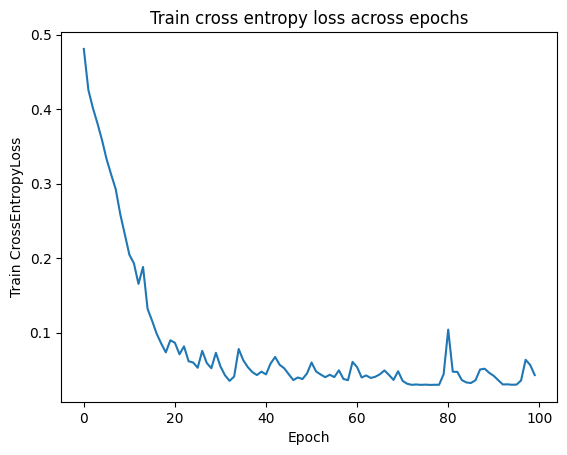

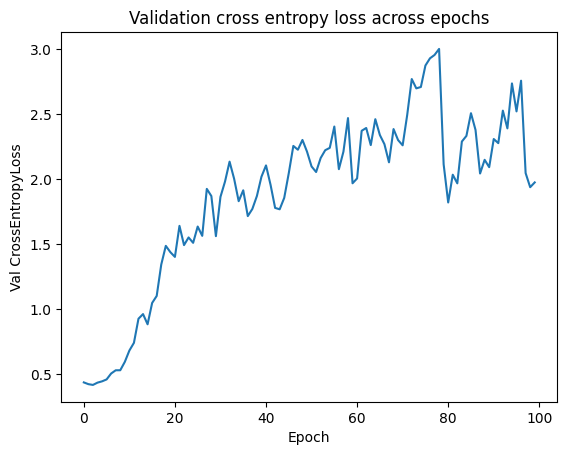

In [ ]:
plot_loss(epoch_train_loss, 'Train cross entropy loss across epochs', 'Epoch', 'Train CrossEntropyLoss')
plot_loss(epoch_val_loss, 'Validation cross entropy loss across epochs', 'Epoch', 'Val CrossEntropyLoss')

In [ ]:
from scipy.special import softmax
from sklearn.metrics import classification_report

def calc_metrics(dataset, model):
    y_true = None
    y_pred = None
    with torch.no_grad():
        X, y = dataset.X.to(device), dataset.y.to(device)
        pred = model(X)
        y_true = y.cpu().detach().numpy()
        y_pred = pred.cpu().detach().numpy()
    y_pred = softmax(y_pred, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    report = classification_report(y_true, y_pred)
    print(report)

In [ ]:
print('Train evaluation')
calc_metrics(train_set, model)
print('Validation evaluation')
calc_metrics(val_set, model)

Train evaluation
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3900
           1       0.99      0.97      0.98      2951

    accuracy                           0.98      6851
   macro avg       0.98      0.98      0.98      6851
weighted avg       0.98      0.98      0.98      6851

Validation evaluation
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       442
           1       0.75      0.72      0.74       320

    accuracy                           0.78       762
   macro avg       0.78      0.78      0.78       762
weighted avg       0.78      0.78      0.78       762



In [ ]:
!pip install sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 111.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=238f6e05789cb5511668ceefc595a38866546a39ee21d8339b3c07ab598bcc4d
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens', device='cuda')

In [ ]:
X = train_df['stopwords_removed_sentence']
y = train_df['target']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
Sentence_cols = ['Sentence_' + str(i) for i in range(768)]

In [ ]:
X_train_em = X_train.values
text_emb = model.encode(X_train_em)
print(text_emb.shape)
X_train_em = pd.DataFrame(text_emb, columns=Sentence_cols)
print(X_train_em)

(6851, 768)
      Sentence_0  Sentence_1  Sentence_2  Sentence_3  Sentence_4  Sentence_5  \
0       0.299206    1.015177    0.965454    0.566308    0.669348   -0.556285   
1       0.532525    0.805968    0.902868   -0.157333    0.198909   -0.523266   
2      -0.122900    0.539903   -0.085495   -0.268423   -0.060678    0.347390   
3       0.406469    0.438820    1.080134    0.301892    0.658556   -0.465337   
4      -0.489629    0.746419    1.067451    0.259011    0.280745   -0.502929   
...          ...         ...         ...         ...         ...         ...   
6846    0.627045    0.820707    0.229543    0.126898    0.225611   -0.579978   
6847   -0.548889    0.211364   -0.368780   -0.136506    0.859755    0.102185   
6848    0.511740    0.981014   -0.409157   -0.272918   -0.151468   -0.021816   
6849    0.047877    0.741902    1.033190   -0.134589    0.989542   -0.343112   
6850    0.075570    0.169358    1.608019    0.386375    0.310263   -0.195464   

      Sentence_6  Sentence_

In [ ]:
X_val_em = X_val.values
text_emb = model.encode(X_val_em)
print(text_emb.shape)
X_val_em = pd.DataFrame(text_emb, columns=Sentence_cols)
print(X_val_em)

(762, 768)
     Sentence_0  Sentence_1  Sentence_2  Sentence_3  Sentence_4  Sentence_5  \
0      0.526348    0.800824    0.634972    0.286113    0.008169    0.028383   
1      0.503887    1.002378   -1.208334   -0.289112    0.035752   -0.345863   
2     -0.314997    0.021965    2.082915    0.112398    0.482664    0.015728   
3     -0.363996   -0.190438    1.688853    0.296979    0.872863   -0.386782   
4      0.875923    0.832756    0.433496   -0.419323   -0.107191   -0.493373   
..          ...         ...         ...         ...         ...         ...   
757   -0.209191    0.061559   -0.315298   -0.170548   -0.003665    0.165249   
758    0.080593    0.901603    0.303799    0.062948    0.050712   -1.073922   
759    0.244740    0.262673    0.568897   -0.017635   -0.117896    0.200848   
760   -0.094142    1.325427   -0.331079    1.010107    0.082156   -0.012106   
761   -0.510609    0.362257    0.204600    0.166653    0.150529   -0.763520   

     Sentence_6  Sentence_7  Sentence_8 

In [ ]:
RF(X_train_em,X_val_em,y_train,y_val)

Validation accuracy: 0.791
Training accuracy: 0.992


In [ ]:
model = SentenceTransformer('sentence-transformers/stsb-roberta-base', device='cuda')

In [ ]:
train_df['new_lower'] = train_df['text_clean'].apply(lambda x: x.lower())
#Can be used to skip tokenization, and removal of stop words which is not required for roBERTa.

In [ ]:
X = train_df['new_lower']
y = train_df['target']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
X_train_em = X_train.values
text_emb = model.encode(X_train_em)
print(text_emb.shape)
X_train_em = pd.DataFrame(text_emb, columns=Sentence_cols)
print(X_train_em)

(6851, 768)
      Sentence_0  Sentence_1  Sentence_2  Sentence_3  Sentence_4  Sentence_5  \
0      -0.493188    0.043669   -0.262401   -1.489959    1.300999    1.512431   
1      -0.569846   -0.220472   -0.647020    0.005813    0.171910   -0.208610   
2       0.038334   -0.174544    0.636241   -0.696316    2.155941   -0.033772   
3       0.159815   -0.247690   -0.340564   -0.735377    0.280033    0.634597   
4      -0.380049   -0.185418    0.493037   -0.118549    0.175334    0.167722   
...          ...         ...         ...         ...         ...         ...   
6846   -0.065165   -0.363290    0.295373    0.833487    0.928875   -0.396316   
6847    0.123751    0.196361    0.056384    0.876805    0.640260   -0.403409   
6848   -0.043439   -0.407563   -0.673759   -1.268582    0.736173    0.351233   
6849   -0.383016    0.668403   -1.045402    0.491764    0.180378    0.592160   
6850   -0.127165    0.622080    0.156187    0.479637    1.534866    0.538509   

      Sentence_6  Sentence_

In [ ]:
X_val_em = X_val.values
text_emb = model.encode(X_val_em)
print(text_emb.shape)
X_val_em = pd.DataFrame(text_emb, columns=Sentence_cols)
print(X_val_em)

(762, 768)
     Sentence_0  Sentence_1  Sentence_2  Sentence_3  Sentence_4  Sentence_5  \
0      0.678290    0.046134   -0.457847    1.140125    0.653627    0.180287   
1      0.822064    0.311774   -0.382177   -0.610898    1.288607    0.277674   
2      0.410764   -0.730843   -0.308301    0.839295   -0.329053   -0.592294   
3     -0.563555    0.498039    0.680479   -1.272754    0.460032    0.392188   
4     -0.149170   -0.336398   -0.221975   -0.331341    1.205078    0.382198   
..          ...         ...         ...         ...         ...         ...   
757    0.275242   -0.358681   -0.940167   -0.683799    0.525366   -0.854236   
758   -0.383587   -0.571490   -0.484527   -0.059189   -1.222277    0.461680   
759    0.041465    0.622997   -0.412511   -0.636079    2.213789    0.287400   
760    0.730903   -0.331893   -0.443507   -0.788589    0.774197   -0.411053   
761    0.163295   -0.359145    0.468540    0.483477    1.721882    0.232578   

     Sentence_6  Sentence_7  Sentence_8 

In [ ]:
RF(X_train_em,X_val_em,y_train,y_val)

Validation accuracy: 0.783
Training accuracy: 0.992
